###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [29]:
df1 = pd.read_csv("college_1.csv")
df2 = pd.read_csv("college_2.csv")
merge_df = pd.concat([df1,df2], ignore_index = True)
merge_df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [22]:
merge_df[merge_df['CodeKata Score'] >= 15000].sort_values(by='CodeKata Score', ascending= False).to_csv("Exceeded_expectations.csv")
merge_df[(merge_df['CodeKata Score']>=10000)&(merge_df['CodeKata Score']<15000)].sort_values(by='CodeKata Score', ascending = False).to_csv("Reached_expectations.csv")
merge_df[(merge_df['CodeKata Score']>=7000)&(merge_df['CodeKata Score']<10000)].sort_values(by='CodeKata Score', ascending = False).to_csv("Needs_Improvement.csv")
merge_df[merge_df['CodeKata Score'] < 7000].sort_values(by='CodeKata Score', ascending= False).to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [26]:
merge_df1= merge_df.pivot_table(index="Department", values=['Previous Geekions','CodeKata Score', 'Rising'])
merge_df1['CodeKata Score'],merge_df1['Previous Geekions'],merge_df1['Rising']= round(merge_df1['CodeKata Score'], 2), round(merge_df1['Previous Geekions'], 2), round(merge_df1['Rising'], 2)
merge_df1

,CodeKata Score,Previous Geekions,Rising
Department,,,
Computer Science and Engineering,5079.76,4792.62,287.14
Electronics and Communication Engineering,2777.82,2751.92,25.90
Electronics and Electrical Engineering,3164.71,2822.35,342.35


###### No of students participated 

In [11]:
merge_df['Name'].count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [13]:
merge_df["python"].mean(),merge_df["mysql"].mean(),merge_df["python_en"].mean(),merge_df["computational_thinking"].mean()

(54.35294117647059, 23.5, 29.65714285714286, 2.2)

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [30]:
rising_star = merge_df1.sort_values(by='Rising',ascending = ['False'])
rising_star

,CodeKata Score,Previous Geekions,Rising
Department,,,
Electronics and Communication Engineering,2777.82,2751.92,25.90
Computer Science and Engineering,5079.76,4792.62,287.14
Electronics and Electrical Engineering,3164.71,2822.35,342.35


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [31]:
Shining_stars = merge_df.sort_values(by=['Previous Geekions'],ascending=[False])
Shining_stars.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

In [33]:
piechart= merge_df.pivot_table(index='Department', aggfunc="sum", values=["CodeKata Score", "Previous Geekions", "Rising"] )
piechart

,CodeKata Score,Previous Geekions,Rising
Department,,,
Computer Science and Engineering,320025,301935,18090
Electronics and Communication Engineering,108335,107325,1010
Electronics and Electrical Engineering,53800,47980,5820


<function matplotlib.pyplot.show(close=None, block=None)>

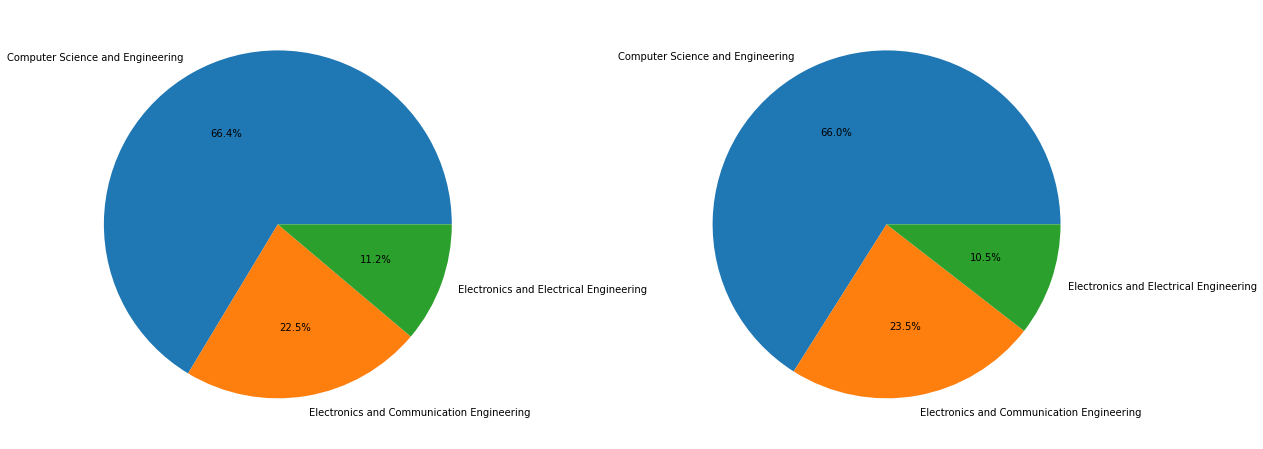

In [34]:
fig= plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.pie(piechart['CodeKata Score'], labels=piechart.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.pie(piechart['Previous Geekions'], labels=piechart.index, autopct='%1.1f%%')

plt.show

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [35]:
deprankers= merge_df.groupby('Department').apply(lambda x : x.sort_values(by = 'CodeKata Score', ascending = False).head(1).reset_index(drop = True))[['Name','CodeKata Score']]
deprankers

,,Name,CodeKata Score
Department,,,
Computer Science and Engineering,0,A.Dharani,24500
Electronics and Communication Engineering,0,Bodipudi Harini,10040
Electronics and Electrical Engineering,0,ASHOK KUMAR K,19400


<BarContainer object of 3 artists>

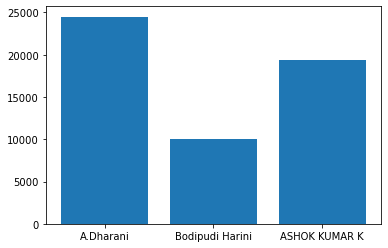

In [36]:
plt.bar(deprankers['Name'], deprankers['CodeKata Score'])